In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Load Data

In [2]:
train = pd.read_csv('data/train_data/train_task_3_4.csv')
validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')

train.nunique(), validation.nunique(), test.nunique()

(QuestionId           948
 UserId              4918
 AnswerId         1382727
 IsCorrect              2
 CorrectAnswer          4
 AnswerValue            4
 dtype: int64,
 Unnamed: 0.1    25
 Unnamed: 0      25
 left            24
 right           25
 T1_ALR           2
 T2_CL            2
 T3_GF            2
 T4_MQ            2
 T5_NS            2
 dtype: int64,
 Unnamed: 0.1    25
 Unnamed: 0      25
 left            25
 right           24
 T1_ALR           2
 T2_CL            2
 T3_GF            2
 T4_MQ            2
 T5_NS            2
 dtype: int64)

In [3]:
# Check for missing values
train.isnull().sum(), validation.isnull().sum(), test.isnull().sum()

(QuestionId       0
 UserId           0
 AnswerId         0
 IsCorrect        0
 CorrectAnswer    0
 AnswerValue      0
 dtype: int64,
 Unnamed: 0.1    0
 Unnamed: 0      0
 left            0
 right           0
 T1_ALR          0
 T2_CL           0
 T3_GF           0
 T4_MQ           0
 T5_NS           0
 dtype: int64,
 Unnamed: 0.1    0
 Unnamed: 0      0
 left            0
 right           0
 T1_ALR          0
 T2_CL           0
 T3_GF           0
 T4_MQ           1
 T5_NS           0
 dtype: int64)

In [4]:
# Load Metadatas
answer_meta = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')
question_meta = pd.read_csv('data/metadata/question_metadata_task_3_4.csv')
student_meta = pd.read_csv('data/metadata/student_metadata_task_3_4.csv')

answer_meta.nunique(), question_meta.nunique(), student_meta.nunique()

(AnswerId          1508917
 DateAnswered       182020
 Confidence              5
 GroupId               390
 QuizId                120
 SchemeOfWorkId          2
 dtype: int64,
 QuestionId    948
 SubjectId      62
 dtype: int64,
 UserId          6148
 Gender             4
 DateOfBirth       65
 PremiumPupil       2
 dtype: int64)

In [5]:
# Check Answer Metadata
answer_meta.isnull().sum()

AnswerId                0
DateAnswered            0
Confidence        1125821
GroupId                 0
QuizId                  0
SchemeOfWorkId     143461
dtype: int64

In [6]:
# Drop columns that I think are not useful.
answer_meta.drop(['DateAnswered', 'GroupId', 'SchemeOfWorkId'], axis=1, inplace=True)

Text(0.5, 1.0, 'Confidence Histogram')

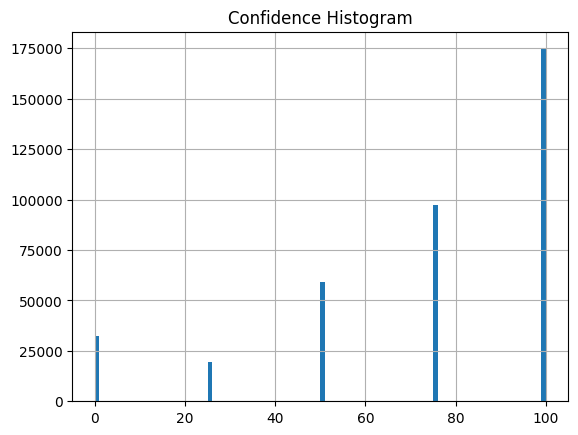

In [7]:
# Draw Histograms for Answer Metadata's [Confidence]
answer_meta['Confidence'].hist(bins=100).set_title('Confidence Histogram')

Text(0.5, 1.0, 'Confidence Histogram')

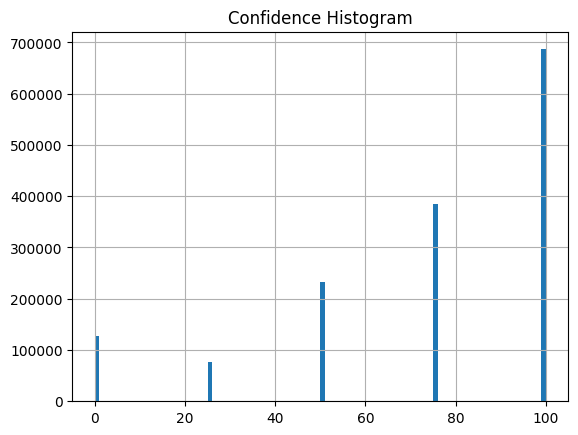

In [8]:
# Fill missing values

def fillna_with_prob(data, probabilities):
    missing_mask = data.isnull()
    fill_values = np.random.choice(probabilities.index, size=missing_mask.sum(), p=probabilities.values)
    data[missing_mask] = fill_values
    return data

value_counts = answer_meta['Confidence'].value_counts()

new_confidence = fillna_with_prob(answer_meta['Confidence'].copy(), value_counts/value_counts.sum())

new_confidence.hist(bins=100).set_title('Confidence Histogram')

In [9]:
new_confidence.isnull().sum()

# Change value 100~0 to 5~1

new_confidence = new_confidence.replace({100: 5, 75: 4, 50: 3, 25: 2, 0: 1})

In [10]:
# Change the column in answer_meta

answer_meta['Confidence'] = new_confidence

In [11]:
answer_meta.isnull().sum()

AnswerId      0
Confidence    0
QuizId        0
dtype: int64

In [12]:
# Merge Answer Metadata with Train Data

train = pd.merge(train, answer_meta, on='AnswerId', how='left')

train.info(), train.isnull().sum(), train.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382727 entries, 0 to 1382726
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   QuestionId     1382727 non-null  int64  
 1   UserId         1382727 non-null  int64  
 2   AnswerId       1382727 non-null  int64  
 3   IsCorrect      1382727 non-null  int64  
 4   CorrectAnswer  1382727 non-null  int64  
 5   AnswerValue    1382727 non-null  int64  
 6   Confidence     1382727 non-null  float64
 7   QuizId         1382727 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 94.9 MB


(None,
 QuestionId       0
 UserId           0
 AnswerId         0
 IsCorrect        0
 CorrectAnswer    0
 AnswerValue      0
 Confidence       0
 QuizId           0
 dtype: int64,
 QuestionId           948
 UserId              4918
 AnswerId         1382727
 IsCorrect              2
 CorrectAnswer          4
 AnswerValue            4
 Confidence             5
 QuizId               120
 dtype: int64)

In [13]:
train.head(20)

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence,QuizId
0,898,2111,280203,1,2,2,3.0,86
1,767,3062,55638,1,3,3,2.0,39
2,165,1156,386475,1,2,2,3.0,39
3,490,1653,997498,1,4,4,3.0,115
4,298,3912,578636,1,3,3,5.0,78
5,791,5040,1335238,1,2,2,4.0,17
6,932,3923,6545,0,4,3,2.0,57
7,134,5163,1042162,0,1,2,5.0,46
8,370,3854,453105,0,2,3,4.0,37
9,840,3896,150788,0,1,2,5.0,66


In [14]:
def entropy(x):
    probabilities = x.value_counts(normalize=True)
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

_entropy = train.groupby('QuestionId')['AnswerValue'].agg(entropy)

QuestionId
0      1.723236
1      1.263809
2      1.921184
3      1.003283
4      1.910592
         ...   
943    1.382886
944    1.893399
945    1.819144
946    1.784228
947    1.561883
Name: AnswerValue, Length: 948, dtype: float64


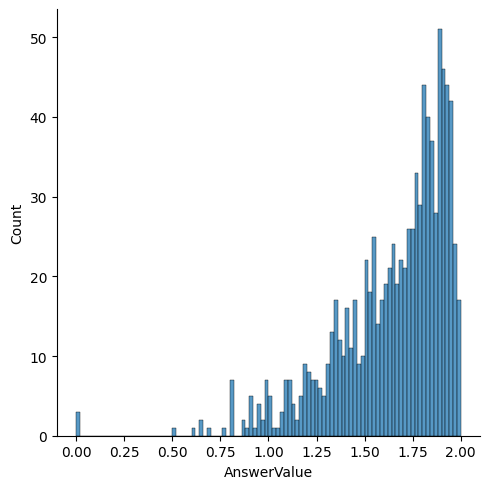

In [15]:
print(_entropy)
sns.displot(_entropy, bins=100)

In [16]:
# Add Entropy to Train Data

train['Entropy'] = train['QuestionId'].map(_entropy)

train = pd.merge(train, answer_meta, on='AnswerId', how='left')
train.head(20)

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Confidence_x,QuizId_x,Entropy,Confidence_y,QuizId_y
0,898,2111,280203,1,2,2,3.0,86,1.727991,3.0,86
1,767,3062,55638,1,3,3,2.0,39,1.749028,2.0,39
2,165,1156,386475,1,2,2,3.0,39,1.645512,3.0,39
3,490,1653,997498,1,4,4,3.0,115,1.381621,3.0,115
4,298,3912,578636,1,3,3,5.0,78,1.714282,5.0,78
5,791,5040,1335238,1,2,2,4.0,17,0.810066,4.0,17
6,932,3923,6545,0,4,3,2.0,57,1.947632,2.0,57
7,134,5163,1042162,0,1,2,5.0,46,1.496335,5.0,46
8,370,3854,453105,0,2,3,4.0,37,1.649912,4.0,37
9,840,3896,150788,0,1,2,5.0,66,1.738233,5.0,66


In [17]:
train.drop(['Confidence_x', 'QuizId_x', 'QuizId_y'], axis=1, inplace=True)
train.nunique(), train.isnull().sum()

(QuestionId           948
 UserId              4918
 AnswerId         1382727
 IsCorrect              2
 CorrectAnswer          4
 AnswerValue            4
 Entropy              934
 Confidence_y           5
 dtype: int64,
 QuestionId       0
 UserId           0
 AnswerId         0
 IsCorrect        0
 CorrectAnswer    0
 AnswerValue      0
 Entropy          0
 Confidence_y     0
 dtype: int64)

In [18]:
train['Difficulty'] = 1 - train['IsCorrect']
difficulty = train.groupby('QuestionId')['Difficulty'].mean().reset_index()
difficulty.head()

,QuestionId,Difficulty
0,0,0.556543
1,1,0.428571
2,2,0.614786
3,3,0.191243
4,4,0.598592


In [19]:
min_difficulty = difficulty['Difficulty'].min()
max_difficulty = difficulty['Difficulty'].max()
difficulty['Normalized'] = (difficulty['Difficulty'] - min_difficulty) / (max_difficulty - min_difficulty)

In [20]:
train = train.merge(difficulty[['QuestionId', 'Normalized']], on='QuestionId', how='left')
train.head(), train.isnull().sum()

(   QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue  \
 0         898    2111    280203          1              2            2   
 1         767    3062     55638          1              3            3   
 2         165    1156    386475          1              2            2   
 3         490    1653    997498          1              4            4   
 4         298    3912    578636          1              3            3   
 
     Entropy  Confidence_y  Difficulty  Normalized  
 0  1.727991           3.0           0    0.552575  
 1  1.749028           2.0           0    0.563371  
 2  1.645512           3.0           0    0.513659  
 3  1.381621           3.0           0    0.362003  
 4  1.714282           5.0           0    0.548084  ,
 QuestionId       0
 UserId           0
 AnswerId         0
 IsCorrect        0
 CorrectAnswer    0
 AnswerValue      0
 Entropy          0
 Confidence_y     0
 Difficulty       0
 Normalized       0
 dtype: int64)

In [21]:
train.nunique()

QuestionId           948
UserId              4918
AnswerId         1382727
IsCorrect              2
CorrectAnswer          4
AnswerValue            4
Entropy              934
Confidence_y           5
Difficulty             2
Normalized           887
dtype: int64

In [22]:
# # Calculate Quality 
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# train['Quality'] = -1

# X = train[['CorrectAnswer', 'AnswerValue', 'Confidence_y', 'Entropy']]

In [23]:
train.info(), train.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382727 entries, 0 to 1382726
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   QuestionId     1382727 non-null  int64  
 1   UserId         1382727 non-null  int64  
 2   AnswerId       1382727 non-null  int64  
 3   IsCorrect      1382727 non-null  int64  
 4   CorrectAnswer  1382727 non-null  int64  
 5   AnswerValue    1382727 non-null  int64  
 6   Entropy        1382727 non-null  float64
 7   Confidence_y   1382727 non-null  float64
 8   Difficulty     1382727 non-null  int64  
 9   Normalized     1382727 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 116.0 MB


(None,
 QuestionId           948
 UserId              4918
 AnswerId         1382727
 IsCorrect              2
 CorrectAnswer          4
 AnswerValue            4
 Entropy              934
 Confidence_y           5
 Difficulty             2
 Normalized           887
 dtype: int64)

In [24]:
# num_clusters = 450
# kmeans = KMeans(n_clusters=num_clusters, random_state=101)
# train['Cluster'] = kmeans.fit_predict(X)

In [25]:
# def score_cluster(cluster_data):
#     avg_confidence = cluster_data['Entropy'].mean()
#     correct_ratio = cluster_data['Difficulty'].sum() / len(cluster_data)
#     score = avg_confidence * correct_ratio 
#     return score

# def score_data_point(row):
#     return row['Confidence_y'] * row['IsCorrect']

# for i in range(num_clusters):
#     cluster_data = train[train['Cluster'] == i]
#     cluster_score = score_cluster(cluster_data)
    
#     # Calculate the scores for each data point in the cluster
#     data_point_scores = cluster_data.apply(score_data_point, axis=1)
#     # Apply the cluster score as a weight
#     weighted_scores = data_point_scores * cluster_score
#     # Update the quality scores for the entire cluster
#     train.loc[train['Cluster'] == i, 'Quality'] = weighted_scores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train["Quality"] = train['Normalized'] * train['Entropy'] * train['Confidence_y']
data=train.sort_values("Quality",ascending=True).reset_index()
scaler.fit(data)

StandardScaler()

Text(0.5, 1.0, 'Quality Histogram')

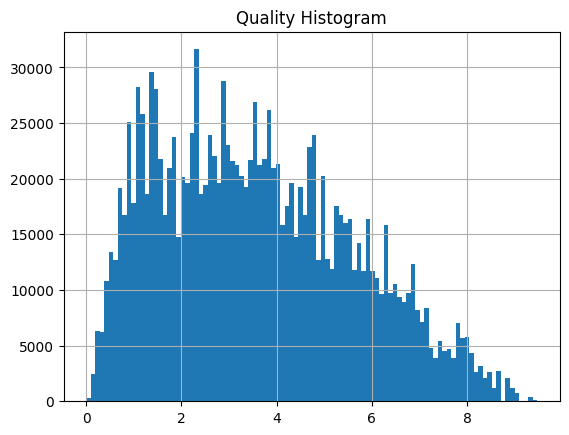

In [26]:
train['Quality'].hist(bins=100).set_title('Quality Histogram')

In [27]:
quality = data['Quality']
quality = quality.sort_values(ascending=False)
quality.head(20)

1382726    9.466994
1382673    9.466994
1382665    9.466994
1382666    9.466994
1382667    9.466994
1382668    9.466994
1382669    9.466994
1382670    9.466994
1382671    9.466994
1382672    9.466994
1382674    9.466994
1382663    9.466994
1382675    9.466994
1382676    9.466994
1382677    9.466994
1382678    9.466994
1382679    9.466994
1382680    9.466994
1382681    9.466994
1382682    9.466994
Name: Quality, dtype: float64

In [28]:
train.nunique()

QuestionId           948
UserId              4918
AnswerId         1382727
IsCorrect              2
CorrectAnswer          4
AnswerValue            4
Entropy              934
Confidence_y           5
Difficulty             2
Normalized           887
Quality             4621
dtype: int64

In [29]:
submission = pd.read_csv('submission/template.csv')
submission['ranking'] = quality

submission.sort_values(by=['ranking'], ascending=False, inplace=True)

submission.head(20)

,QuestionId,ranking
947,947,0.136667
933,933,0.136667
920,920,0.136667
921,921,0.136667
922,922,0.136667
924,924,0.136667
925,925,0.136667
926,926,0.136667
927,927,0.136667
928,928,0.136667


In [30]:
submission.to_csv('submission/submission_new.csv', index=True)

In [31]:
def order2preference(ord, QL, QR):
    preference = []
    for idx in range(len(QL)):
        rankL = ord[ord.QuestionId==QL[idx]].ranking.values[0]
        rankR = ord[ord.QuestionId==QR[idx]].ranking.values[0]
        preference.append(1 if rankL<rankR else 2)
    return preference

def evaluate(truth, submission):
    QL = list(truth.left)
    QR = list(truth.right)
    if len(QL) != len(QR):
        message = 'left and right lengths are not the same'
        exit(message)
    print(list(truth["preference"]))
    return sum(x==y for x,y in zip(truth["preference"],order2preference(submission,QL,QR)))/len(QL)

def evaluates(truth, submission):
    return [
        evaluate(truth.rename(columns={"T1_ALR":"preference"})[["left","right","preference"]], submission),
        evaluate(truth.rename(columns={"T2_CL":"preference"})[["left","right","preference"]], submission),
        evaluate(truth.rename(columns={"T3_GF":"preference"})[["left","right","preference"]], submission),
        evaluate(truth.rename(columns={"T4_MQ":"preference"})[["left","right","preference"]], submission),
        evaluate(truth.rename(columns={"T5_NS":"preference"})[["left","right","preference"]], submission)]

In [32]:
list_vali = evaluates(validation,submission)
print(list(order2preference(submission,list(validation.left),list(validation.right))))
print(list_vali)
print(max(list_vali))

[2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1]
[2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0]
[2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1]
[2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2]
[0.56, 0.6, 0.36, 0.4, 0.48]
0.6
